In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [28]:
# Define the path to the UTKFace dataset
data_dir = r"C:\Users\91939\Downloads\face\UTKFace"
# Define a mapping of indices to nation names
nation_names = {
    0: 'united states',
    1: 'african',
    2: 'asian',
    3: 'indian',
    4: 'others'
}

In [29]:
# Load data function
def load_data(data_dir):
    images = []
    labels = []
    for file in os.listdir(data_dir):
        if file.endswith('.jpg'):
            try:
                # Parse the nationality index (second segment in the filename)
                nationality_index = int(file.split('_')[1])  # Adjusted to use the second segment
                if nationality_index in nation_names:
                    nationality = nationality_index
                else:
                    print(f"Unknown nationality index {nationality_index} in file {file}")
                    continue  # Skip files with unknown nationalities
                # Load and preprocess the image
                img_path = os.path.join(data_dir, file)
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
                img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                images.append(img)
                labels.append(nationality)
            except (ValueError, IndexError) as e:
                print(f"Skipping file {file} due to error: {e}")
    return np.array(images), np.array(labels)
# Load the data
images, labels = load_data(data_dir)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
# One-hot encode the labels
num_classes = len(nation_names)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
# Print the shapes of the split data to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (18966, 128, 128, 3)
X_test shape: (4742, 128, 128, 3)
y_train shape: (18966, 5)
y_test shape: (4742, 5)


In [32]:
# Define data augmentation
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Initialize the model
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output of the convolutional layers to a 1D vector
    Flatten(),
    
    # Add a dense layer for the classification task
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to avoid overfitting

    # Output layer for 5 classes (adjust based on your problem)
    Dense(5, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Check model summary to see the shape before the Dense layer
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(
    data_gen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=40
    
)

Epoch 1/40


C:\Users\91939\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


593/593 ━━━━━━━━━━━━━━━━━━━━ 304s 498ms/step - accuracy: 0.5799 - loss: 0.7156 - val_accuracy: 0.7240 - val_loss: 0.5494
Epoch 2/40
593/593 ━━━━━━━━━━━━━━━━━━━━ 291s 488ms/step - accuracy: 0.6874 - loss: 0.5956 - val_accuracy: 0.7183 - val_loss: 0.5486
Epoch 3/40
593/593 ━━━━━━━━━━━━━━━━━━━━ 305s 511ms/step - accuracy: 0.7175 - loss: 0.5594 - val_accuracy: 0.7870 - val_loss: 0.4656
Epoch 4/40
593/593 ━━━━━━━━━━━━━━━━━━━━ 294s 493ms/step - accuracy: 0.7209 - loss: 0.5499 - val_accuracy: 0.7971 - val_loss: 0.4471
Epoch 5/40
593/593 ━━━━━━━━━━━━━━━━━━━━ 291s 487ms/step - accuracy: 0.7440 - loss: 0.5227 - val_accuracy: 0.8087 - val_loss: 0.4136
Epoch 6/40
593/593 ━━━━━━━━━━━━━━━━━━━━ 286s 479ms/step - accuracy: 0.7609 - loss: 0.5076 - val_accuracy: 0.8075 - val_loss: 0.4080
Epoch 7/40
593/593 ━━━━━━━━━━━━━━━━━━━━ 305s 510ms/step - accuracy: 0.7682 - loss: 0.4918 - val_accuracy: 0.8142 - val_loss: 0.3976
Epoch 8/40
593/593 ━━━━━━━━━━━━━━━━━━━━ 303s 507ms/step - accuracy: 0.7816 - loss: 0.46

In [35]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

149/149 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.8844 - loss: 0.2618
Test Accuracy: 89.10%


In [36]:
# Save the trained model
model.save('nation_model.h5')

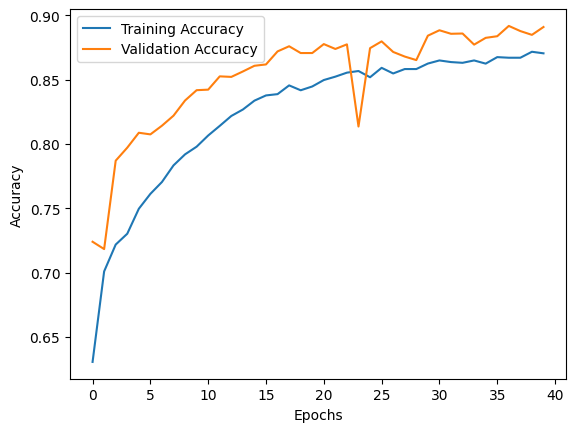

In [37]:
# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
# Save model architecture as JSON
model_json = model.to_json()
# Write the model architecture to a JSON file
with open("nation_model.json", "w") as json_file:
    json_file.write(model_json)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


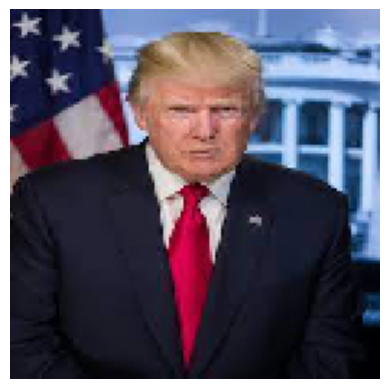

Predicted Nationality: united states


In [53]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import json
import os
import matplotlib.pyplot as plt
# Load the trained model
model = tf.keras.models.load_model('nation_model.h5')  # Use the correct path to your model
# Define the nationality mapping directly
nation_names = {
    0: 'united states',
    1: 'african',
    2: 'asian',
    3: 'indian',
    4: 'others'
}
# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))  # Resize to the expected input size
    img_array = image.img_to_array(img) / 255.0  # Convert to array and normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array  # Return both the image and its preprocessed array
# Function to predict nationality
def predict_nationality(image_path):
    # Check if the file exists
    if not os.path.exists(image_path):
        return "File not found. Please check the file path."    
    # Preprocess the image
    img, img_array = load_and_preprocess_image(image_path)    
    # Make prediction
    prediction = model.predict(img_array)    
    # Get the index of the maximum prediction
    nationality_index = np.argmax(prediction, axis=-1)[0]    
    # Map the prediction index to the nationality label
    nationality = nation_names[nationality_index]  
    return nationality, img
def main():
    image_path = r"C:\Users\91939\OneDrive\Desktop\images.jpg" 
    predicted_nationality, img = predict_nationality(image_path)    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes for better view
    plt.show()  # Show the image   
    # Print the predicted nationality
    print(f"Predicted Nationality: {predicted_nationality}")
# Run the main function to predict nationality based on the provided image
if __name__ == "__main__":
    main()